## Getting Album Recommendations from P4K

**Read User Library, sort on an audio feature and threshold, and find 2017 album recommendations from P4K based on your weighted audio features (by standard deviations and mean)**

Requirements:

Have 'sp-&-p4k_combined-2017-utf8sig-final.csv' and 'our_tracks.csv' in same directory as NB.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS


pd.options.display.float_format = '{:,.4f}'.format
%matplotlib inline


In [2]:
# Optional: Only if you don't have this.
# pip install wordcloud

In [3]:
combined_reviews_fname = 'sp-&-p4k_combined-2017-utf8sig-final.csv'

sp_p4k_2017_df = pd.read_csv(combined_reviews_fname, index_col = 0)

sp_p4k_2017_df.tail()

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,valence,popularity,duration_ms,is_explicit,artist,best,date,genre,review,score
1058,spotify:album:7z7hGOK5ZvGQ2rCp9TyMHc,Happy Together,Mega Bog,0.4337,0.4270,0.6402,0.2764,0.1942,-7.2556,0.0519,...,0.4747,5.7778,1638435,0,Mega Bog,0,February 6 2017,Experimental,Mega Bog is the malleable rock band mastermind...,7.4000
1059,spotify:album:7zJ6TVgvzdV9HPE8KA2a7R,Hate Songs EP,Suicideyear,0.1792,0.5723,0.6933,0.5878,0.1883,-6.0307,0.0513,...,0.1758,9.5000,1548171,0,Suicideyear,0,July 28 2017,Electronic,Stepping away from his habitual trap beats and...,7.3000
1060,spotify:album:7zg9ZSOQtYLjWnvSawflg6,Born Again,The Notorious B.I.G.,0.1496,0.6924,0.7748,0.0038,0.2771,-5.6680,0.3424,...,0.6352,44.8824,4294841,17,The Notorious B.I.G.,0,March 9 2017,Rap,The half-baked 1999 release Born Again reeks o...,6.0000
1061,spotify:album:7zo4kiBFeJ6fTRJLTKo7XU,Belladonna of Sadness,Alexandra Savior,0.0671,0.5226,0.6552,0.0029,0.2239,-7.2379,0.0403,...,0.5956,41.2000,2248784,1,Alexandra Savior,0,April 19 2017,Pop/R&B,The young American singer launches her career ...,6.0000
1062,spotify:album:7zy6BF4J1cdLVZaPoTbLa7,All Blue,G Perico,0.1640,0.8337,0.6395,0.0000,0.1961,-6.9567,0.3181,...,0.5325,22.1818,1774000,11,G Perico,0,May 5 2017,Rap,While nodding to West Coast legends of the ’90...,7.9000


In [4]:
def plotWordCloud(df_word_cloud):
    """
    Input any df with reviews in it. Generates word clout plot for their reviews.
    """
    comment_words = ''
    additional_stopwords = set(("song", "album", "record", "music", "songs", "track", "band", "sound", "s", "t", "year"))
    stopwords =  set(STOPWORDS).union(additional_stopwords)

    df_word_cloud = df_word_cloud.review

    # iterate through the csv file
    for val in df_word_cloud:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()
        tokens = [token for token in tokens if len(token) > 1]

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10, collocations=False).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

## Add column to DF to indicate if album is in Group 1, 2, 3, 4

Group 1: "favorites"
- above average popularity, above average score

Group 2: "underrated"
- below average popularity, above average score

Group 3: "overrated"
- above average popularity, below average score

Group 4: "ignorables"
- below average popularity, below average score

In [5]:
mean_score_allData = sp_p4k_2017_df.score.mean()
mean_pop_allData = sp_p4k_2017_df.popularity.mean()

def label_group(row):
   if (row['popularity'] > mean_pop_allData) and (row['score'] > mean_score_allData) :
      return 'favorites'
   if (row['popularity'] <= mean_pop_allData) and (row['score'] > mean_score_allData) :
      return 'underrated'
   if (row['popularity'] > mean_pop_allData) and (row['score'] <= mean_score_allData) :
      return 'overrated'
   else:
      return 'ignorables'

sp_p4k_2017_df['group_label'] = sp_p4k_2017_df.apply(lambda row: label_group(row), axis=1)
sp_p4k_2017_df.head(5)

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,popularity,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label
0,spotify:album:00LS6GJwb5ZPTKS8NMAT8x,Ultramega OK,Soundgarden,0.0167,0.3555,0.8228,0.2762,0.1938,-8.2745,0.0634,...,23.5263,4224568,0,Soundgarden,0,March 20 2017,Rock,"Originally released in 1988 on SST, Soundgarde...",7.3000,underrated
1,spotify:album:00MAXeszCotk3g9q8KYJlZ,Elastica,Elastica,0.0132,0.5434,0.7989,0.3546,0.1419,-5.6124,0.0444,...,27.6429,2186449,1,Elastica,0,September 24 2017,Rock,"With its pithy, searing songs about sex, group...",8.5000,favorites
2,spotify:album:00RnMn3ikeVB6gdOMZ3mwQ,No Mountains in Manhattan,Wiki,0.4477,0.5967,0.7189,0.0005,0.3150,-6.6996,0.3737,...,18.4000,3191839,15,Wiki,0,August 30 2017,Rap,Wiki’s new album is an acidic and vivid manife...,8.1000,underrated
3,spotify:album:02ER13KaisZo5CG2BydCWn,Americana,Ray Davies,0.4588,0.5249,0.4491,0.0010,0.1896,-12.1996,0.0432,...,11.6667,3511114,0,Ray Davies,0,April 18 2017,Rock,The Kinks legend uses Americana to blaze a pat...,7.3000,underrated
4,spotify:album:02Lx6I5EsUDFIdnS3pSNNT,Rosewood Almanac,Will Stratton,0.6693,0.4786,0.3263,0.0458,0.1885,-12.1106,0.0342,...,7.6667,1775810,0,Will Stratton,0,May 22 2017,Folk/Country,"With pastoral folk roots, New York singer-song...",7.0000,ignorables


## Getting Recommendations based on vector input

For our personal datasets, we can choose an audio feature, give a threshold value and specify above or below for direction. We can generate a vector of other audio features for our libraries based on this threshold. We want the audio feature, average value, and weight (assumed = 1). The weights can be changed based on the inverse of the variance of the audio features, and their relative %.

Then we get the subset of p4k data with this audio feature threshold met. Lets say valence above 0.3 for example. 

On this subset, we will apply a row function to create the distance between our library vector and the album's audio features. The distance will only use the audio features specified by our library vector, and will use the weights specified for each audio feature.

Each album will have a distance added as a variable. Sort by shortest distance to find the closest recommended albums for the user.

In [6]:
def getAlbumDistance(row, library_vector: dict):
    """
    Inputs:
    row: the album row from data frame
    library_vector: dictionary of audio feature keys, and values as average_value, weight of each key
    """
    distance = 0
    for audio_feature in library_vector:
        temp_dist = library_vector[audio_feature]['weight'] * np.power((row[audio_feature] - library_vector[audio_feature]['average_value']), 2)
        distance = distance + temp_dist
    return np.sqrt(distance)

In [7]:
def P4K_Recommended(by_audio_feature: str, threshold: float, above_threshold: bool, library_vector: dict, P4K_DF):
    """
    by_audio_feature: name of audio feature to filter pitchfork df by
    """
    # get a copy of the p4k DF based on the audio feature
    if above_threshold:
        focused_P4K_DF = P4K_DF[P4K_DF[by_audio_feature] > threshold].copy()
    else:
        focused_P4K_DF = P4K_DF[P4K_DF[by_audio_feature] <= threshold].copy()
    
    focused_P4K_DF['distance'] = focused_P4K_DF.apply(lambda row: getAlbumDistance(row, library_vector), axis=1)
    return focused_P4K_DF.sort_values('distance', ascending=True)

def P4K_Recommended_noFilter(library_vector: dict, P4K_DF):
    """
    version of P4K_Recommended that does no filtering based on audio feature. 
    Will look for album recommendations in the whole DF, for all audio features in the library_vector.
    """
    
    focused_P4K_DF = P4K_DF.copy()
    # get a copy of the p4k DF based on the audio feature
    
    focused_P4K_DF['distance'] = focused_P4K_DF.apply(lambda row: getAlbumDistance(row, library_vector), axis=1)
    return focused_P4K_DF.sort_values('distance', ascending=True)

## Library Data to get our album recommendations

In [8]:
# load in our tracks df
our_tracks_df = pd.read_csv("our_tracks.csv")

# group by users
our_tracks_by_users = our_tracks_df.groupby('username')


Get a user's tracks df. Using mine for testing.

In [9]:
anand_df = our_tracks_by_users.get_group('Anand')

Get some threshold values for our audio feature to stratify on. We will look at valence (low and high) and energy (low, high) in our study.

In [10]:
user_df = anand_df

user_low_valence_thres = user_df['valence'].quantile(0.25)
user_high_valence_thres = user_df['valence'].quantile(0.75)

user_low_energy_thres = user_df['energy'].quantile(0.25)
user_high_energy_thres = user_df['energy'].quantile(0.75)

In [11]:
def get_library_vector(user_df, audio_feature: str, threshold: float, is_above: bool, is_weighted: bool):
    """
    Returns the library vector and weights for the audio features other than the specified one.
    """
    # get the filtered df for the user
    if is_above:
        filtered_user_df = user_df[user_df[audio_feature] > threshold]
    else:
        filtered_user_df = user_df[user_df[audio_feature] <= threshold]
    
    # generate the vector for only the audio_features
    mean_srs = filtered_user_df.mean()
    mean_srs = mean_srs.drop(labels=[audio_feature, 'duration_ms', 'is_explicit', 'key', 'mode'])
    std_srs = filtered_user_df.std()
    std_srs = std_srs.drop(labels=[audio_feature, 'duration_ms', 'is_explicit', 'key', 'mode'])
    
    # generate weight series
    temp = std_srs/mean_srs
    temp2 = np.abs(np.power(temp, -1))
    weights_srs = (temp2/temp2.sum())*100
    
    library_user_dict = {}
    
    for audio_feat in mean_srs.index:
        library_user_dict[audio_feat] = {}
        library_user_dict[audio_feat]['average_value'] = mean_srs[audio_feat]
        
        if is_weighted:
            library_user_dict[audio_feat]['weight'] = weights_srs[audio_feat]
        else:
            library_user_dict[audio_feat]['weight'] = 1
    return library_user_dict
    
    
def get_library_vector_noFilter(user_df, is_weighted: bool):
    """
    Returns the library vector and weights for all the audio features, no filtering
    """   
    unfiltered_user_df = user_df.copy()
    
    # generate the vector for all the audio_features
    mean_srs = unfiltered_user_df.mean()
    mean_srs = mean_srs.drop(labels=['duration_ms', 'is_explicit', 'key', 'mode'])
    std_srs = unfiltered_user_df.std()
    std_srs = std_srs.drop(labels=['duration_ms', 'is_explicit', 'key', 'mode'])
    
    # generate weight series
    temp = std_srs/mean_srs
    temp2 = np.abs(np.power(temp, -1))
    weights_srs = (temp2/temp2.sum())*100
    
    library_user_dict = {}
    
    for audio_feat in mean_srs.index:
        library_user_dict[audio_feat] = {}
        library_user_dict[audio_feat]['average_value'] = mean_srs[audio_feat]
        
        if is_weighted:
            library_user_dict[audio_feat]['weight'] = weights_srs[audio_feat]
        else:
            library_user_dict[audio_feat]['weight'] = 1
    return library_user_dict

High Valence Pitchfork Album Recommendations:

In [12]:
# generate vector based on user library
user_high_valence_dict = get_library_vector(user_df, 'valence', user_high_valence_thres, True, True)
print(user_high_valence_dict)

# get closest matches from pitchfork album reviews
user_recs_p4k_high_valence = P4K_Recommended('valence', user_high_valence_thres, True, user_high_valence_dict, sp_p4k_2017_df)
user_recs_p4k_high_valence.head(10)

{'popularity': {'average_value': 28.59, 'weight': 7.411666424041666}, 'danceability': {'average_value': 0.6163599999999998, 'weight': 21.24018473140925}, 'energy': {'average_value': 0.6533500000000003, 'weight': 15.528607521740945}, 'loudness': {'average_value': -9.5753, 'weight': 11.302087275142995}, 'speechiness': {'average_value': 0.07739200000000006, 'weight': 4.798867066988189}, 'acousticness': {'average_value': 0.3201709399999999, 'weight': 4.7609228543446696}, 'instrumentalness': {'average_value': 0.44287093480000017, 'weight': 5.607124793850626}, 'liveness': {'average_value': 0.17945500000000003, 'weight': 5.84324581067509}, 'tempo': {'average_value': 128.59617000000003, 'weight': 23.507293521806556}}


,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
600,spotify:album:4HuzPUi36WvuyGWKUcQEkt,Lifestyles of the Laptop Café,The Other People Place,0.0240,0.7437,0.4385,0.8565,0.0992,-11.6031,0.0824,...,3113530,0,The Other People Place,1,February 13 2017,Electronic,Best new reissue The only record by Drexciya’s...,8.8000,favorites,8.3838
229,spotify:album:1jmReMlhBKjUB7KXg9Pdxm,Thawing Dawn,A. Savage,0.3689,0.4760,0.4859,0.2632,0.1468,-9.4047,0.0355,...,2757123,0,A. Savage,0,October 23 2017,Rock,The debut solo LP from Andrew Savage of Parque...,7.2000,overrated,9.0084
155,spotify:album:1CVuPxNHwY5ORJ8MhjD0UB,Freedom Highway,Rhiannon Giddens,0.7223,0.6461,0.3407,0.0844,0.1275,-11.2980,0.0610,...,2726250,0,Rhiannon Giddens,0,February 23 2017,Folk/Country,Rhiannon Giddens emerges as a peerless and pow...,7.6000,favorites,10.5839
77,spotify:album:0d6ky7EGJ0DBxCsSR9R5SR,Take Flight,Maya Jane Coles,0.2233,0.7122,0.7256,0.6971,0.1646,-7.2659,0.0524,...,6436775,1,Maya Jane Coles,0,August 23 2017,Electronic,The first major release in three years from Br...,6.0000,overrated,12.0145
1,spotify:album:00MAXeszCotk3g9q8KYJlZ,Elastica,Elastica,0.0132,0.5434,0.7989,0.3546,0.1419,-5.6124,0.0444,...,2186449,1,Elastica,0,September 24 2017,Rock,"With its pithy, searing songs about sex, group...",8.5000,favorites,14.2950
759,spotify:album:5RYg5ZR0qfRebkseuqlGJj,Moonshine Freeze,This Is the Kit,0.6982,0.5047,0.4357,0.0752,0.1442,-10.3621,0.0418,...,2527090,0,This Is the Kit,0,July 26 2017,Folk/Country,"With her new record as This Is the Kit, singer...",7.3000,favorites,14.7626
319,spotify:album:2NF7kUOEaNYhCWLANV85Aj,Joli Mai,Daphni,0.1557,0.7351,0.6327,0.8608,0.1288,-11.8086,0.0544,...,3363923,0,Daphni,0,October 28 2017,Electronic,Dan Snaith’s new LP as Daphni contains unmixed...,6.8000,overrated,15.3250
403,spotify:album:2vTelM2ZV20cLPqQwfWhYa,Dots and Loops,Stereolab,0.4038,0.5759,0.5274,0.4300,0.1382,-11.0015,0.0549,...,6277297,0,Stereolab,0,July 23 2017,Experimental,Stereolab’s masterpiece fused analog with digi...,9.2000,favorites,17.2470
895,spotify:album:6VNXIYzXocTyZMNDLG88Gb,Mista Thug Isolation,Lil Ugly Mane,0.0441,0.5880,0.7539,0.0539,0.2220,-7.7724,0.2247,...,3874722,18,Lil Ugly Mane,0,April 12 2017,Rap,Noise musician turned rapper Travis Miller mad...,8.2000,favorites,17.5226
861,spotify:album:6GdJPhGu12KSZ7KdgBfye1,One Night Only,Cousin Stizz,0.3071,0.8574,0.5773,0.0018,0.1512,-5.2903,0.0998,...,2343888,12,Cousin Stizz,0,July 20 2017,Rap,"On his major label debut, the once-scrappy Bos...",6.9000,overrated,18.1016


Low Valence Pitchfork Album Recommendations:

In [13]:
# generate vector based on user library
user_low_valence_dict = get_library_vector(user_df, 'valence', user_low_valence_thres, False, True)
print(user_low_valence_dict)

# get closest matches from pitchfork album reviews
user_recs_p4k_low_valence = P4K_Recommended('valence', user_low_valence_thres, False, user_low_valence_dict, sp_p4k_2017_df)
user_recs_p4k_low_valence.head(10)

{'popularity': {'average_value': 25.91, 'weight': 8.405718712752789}, 'danceability': {'average_value': 0.30931300000000006, 'weight': 10.434289407037918}, 'energy': {'average_value': 0.33428099999999994, 'weight': 8.565520237918209}, 'loudness': {'average_value': -14.889910000000002, 'weight': 13.54049984619805}, 'speechiness': {'average_value': 0.041903, 'weight': 14.094088646865218}, 'acousticness': {'average_value': 0.5639588099999999, 'weight': 8.153175825135037}, 'instrumentalness': {'average_value': 0.5835046699999998, 'weight': 8.882428180081375}, 'liveness': {'average_value': 0.16291500000000006, 'weight': 7.254158492677626}, 'tempo': {'average_value': 109.08485, 'weight': 20.67012065133377}}


,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
815,spotify:album:5n5V1pcevIOdJBF4xfuMlX,Finding People EP,Croatian Amor,0.8590,0.2340,0.2640,0.8780,0.0755,-16.5870,0.0347,...,202264,0,Croatian Amor,0,May 10 2017,Electronic,"On his new EP, Danish electronic artist Loke R...",6.3000,ignorables,28.2666
126,spotify:album:0yf8QgcSSUM9x2CRRtalwL,Grunewald,Peter Broderick,0.9792,0.2760,0.0760,0.6581,0.0969,-20.4394,0.0450,...,1381786,0,Peter Broderick,0,December 16 2016,Experimental,Composer Peter Broderick manages to make simpl...,6.7000,ignorables,33.5535
607,spotify:album:4JQ2igmQEWUihSRzWgTiCF,Narkopop,GAS,0.1794,0.2402,0.1649,0.7607,0.1264,-23.1950,0.0416,...,8996550,0,GAS,1,April 21 2017,Electronic,"Best new music After 17 years, Wolfgang Voigt ...",8.8000,underrated,38.5201
154,spotify:album:1CICQQAxvXbayxDF5jJETJ,Trumpeting Ecstasy,Full of Hell,0.0001,0.2251,0.8876,0.7574,0.4400,-4.7332,0.1098,...,1404611,0,Full of Hell,0,May 9 2017,Metal,The new album from crushers Full of Hell is an...,7.7000,favorites,39.7792
366,spotify:album:2eOMttZbB9lBc9LLMj56xj,Luciferian Towers,Godspeed You! Black Emperor,0.3765,0.1699,0.4804,0.7689,0.1454,-11.5638,0.0424,...,2634017,0,Godspeed You! Black Emperor,0,September 21 2017,Rock,The sound of Godspeed’s radical fury takes a s...,7.3000,favorites,40.1779
782,spotify:album:5brOOtl1XN2Li2IdYBDNzr,Parallels,Nosaj Thing,0.6233,0.4389,0.3529,0.7081,0.1027,-15.2556,0.0446,...,1531420,0,Nosaj Thing,0,September 18 2017,Electronic,"The new album from L.A. producer Jason Chung, ...",6.4000,ignorables,44.9642
394,spotify:album:2rWkvguXepRyMmxIe8Brx3,Balsams,Chuck Johnson,0.7917,0.1106,0.1365,0.8953,0.1041,-17.6880,0.0403,...,2481485,0,Chuck Johnson,0,June 5 2017,Experimental,"On this expressive and singular new album, Chu...",8.1000,favorites,51.4000
299,spotify:album:2A9lnshn6QxS5SmbCsCuu0,Reflections - Mojave Desert,Floating Points,0.4780,0.2496,0.3632,0.7934,0.2335,-14.9568,0.0513,...,3144274,0,Floating Points,0,June 28 2017,Electronic,Sam Shepherd and his ensemble incorporate the ...,7.3000,underrated,52.0491
592,spotify:album:4Ce7dnSqt5FieRvkH8XPG3,Contact,Pharmakon,0.1861,0.1513,0.3936,0.5853,0.2665,-10.4395,0.0721,...,1944130,0,Pharmakon,0,March 30 2017,Experimental,Each track of the new Pharmakon LP can be hear...,7.9000,underrated,52.3329
620,spotify:album:4MzrYQBl4zr5wzqnnHqWd4,All My Circles Run,Sarah Davachi,0.8336,0.1974,0.1384,0.8892,0.0975,-20.3378,0.0456,...,2486180,0,Sarah Davachi,0,March 16 2017,Electronic,Ambient composer Sarah Davachi departs from he...,7.3000,underrated,54.1681


High Energy Pitchfork Album Recommendations:

In [14]:
# generate vector based on user library
user_high_energy_dict = get_library_vector(user_df, 'energy', user_high_energy_thres, True, True)
print(user_high_energy_dict)

# get closest matches from pitchfork album reviews
user_recs_p4k_high_energy = P4K_Recommended('energy', user_high_energy_thres, True, user_high_energy_dict, sp_p4k_2017_df)
user_recs_p4k_high_energy.head(10)

{'popularity': {'average_value': 26.606060606060606, 'weight': 7.844186217881098}, 'danceability': {'average_value': 0.4903424242424242, 'weight': 16.33021022445993}, 'loudness': {'average_value': -6.898909090909086, 'weight': 14.127382784852403}, 'speechiness': {'average_value': 0.0805252525252525, 'weight': 5.6459396293041575}, 'acousticness': {'average_value': 0.13018249161616163, 'weight': 3.5784550941553124}, 'instrumentalness': {'average_value': 0.4587272910101012, 'weight': 6.923380729839011}, 'liveness': {'average_value': 0.23641717171717172, 'weight': 6.964001230297261}, 'valence': {'average_value': 0.42053232323232315, 'weight': 10.648055265193863}, 'tempo': {'average_value': 131.51369696969704, 'weight': 27.938388824016965}}


,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
500,spotify:album:3Z9dDwHYs6mPAW2BHoT4JZ,Material Control,Glassjaw,0.0236,0.3493,0.8792,0.4644,0.2894,-5.3295,0.1488,...,2200421,0,Glassjaw,0,December 6 2017,Rock,"On their first album in 15 years, the Long Isl...",6.6000,overrated,8.3364
295,spotify:album:29HIscCMZKDTvGBWOQgbyf,"Hammersmith Odeon, London ’75",Bruce Springsteen and the E Street Band,0.1747,0.2926,0.7944,0.0077,0.8042,-6.7714,0.1496,...,7491795,0,Bruce Springsteen and the E Street Band,0,April 25 2017,Rock,"Reissued for Record Store Day, the live *Hamme...",9.2000,favorites,8.4646
271,spotify:album:20QC9JeWIAgKxPdTqI0A0U,Dedicated to Bobby Jameson,Ariel Pink,0.1198,0.4964,0.7659,0.0895,0.2335,-4.6739,0.0869,...,2981786,0,Ariel Pink,1,September 15 2017,Rock,Best new music Refining the gonzo pop-collages...,8.2000,favorites,8.9446
286,spotify:album:26hqnB0XF1ZFc31zY6NAgf,Near to the Wild Heart of Life,Japandroids,0.0269,0.2970,0.9359,0.0990,0.1544,-4.5505,0.0714,...,2208704,0,Japandroids,0,January 24 2017,Rock,"For the most part, Near to the Wild Heart of L...",7.1000,overrated,9.2550
306,spotify:album:2HJ2jjZjPe7jhKL6OwtoZY,GT Ultra,Guerilla Toss,0.0035,0.5397,0.8940,0.0498,0.1553,-4.6412,0.0636,...,1741672,0,Guerilla Toss,0,July 5 2017,Experimental,"On their latest, this Brooklyn dance-noise qui...",7.5000,favorites,11.0739
1,spotify:album:00MAXeszCotk3g9q8KYJlZ,Elastica,Elastica,0.0132,0.5434,0.7989,0.3546,0.1419,-5.6124,0.0444,...,2186449,1,Elastica,0,September 24 2017,Rock,"With its pithy, searing songs about sex, group...",8.5000,favorites,12.0764
832,spotify:album:5ypM6np3JwpXdApOm8bpQ8,Black Laden Crown,Danzig,0.0059,0.3591,0.8073,0.0138,0.1213,-7.6010,0.0519,...,2754211,2,Danzig,0,May 30 2017,Metal,Black Laden Crown is Danzig’s strongest album ...,6.4000,ignorables,12.4346
391,spotify:album:2pzI39O9jAVFghND0SiQHm,Who Built the Moon?,Noel Gallagher's High Flying Birds,0.1427,0.4050,0.7965,0.3102,0.2421,-5.4043,0.0494,...,2932568,0,Noel Gallagher's High Flying Birds,0,November 28 2017,Rock,Noel Gallagher’s latest is the most ambitious ...,7.1000,overrated,14.7982
632,spotify:album:4TDs45eAaIN56dI2FgZObB,Need to Feel Your Love,Sheer Mag,0.1788,0.6068,0.8212,0.3442,0.2171,-4.9954,0.0582,...,2560727,0,Sheer Mag,0,July 14 2017,Rock,"On their debut LP, Sheer Mag keep biting at th...",8.0000,favorites,15.8852
847,spotify:album:68aZtDbgNargCMYgNvw5JG,Ne? Wax Bloom,Iglooghost,0.0720,0.5215,0.7862,0.2446,0.3313,-8.1091,0.1214,...,2465594,0,Iglooghost,0,October 4 2017,Electronic,The new album from Irish producer Iglooghost p...,7.3000,favorites,17.0833


Low Energy Pitchfork Album Recommendations:

In [15]:
# generate vector based on user library
user_low_energy_dict = get_library_vector(user_df, 'energy', user_low_energy_thres, False, True)
print(user_low_energy_dict)

# get closest matches from pitchfork album reviews
user_recs_p4k_low_energy = P4K_Recommended('energy', user_low_energy_thres, False, user_low_energy_dict, sp_p4k_2017_df)
user_recs_p4k_low_energy.head(10)

{'popularity': {'average_value': 27.51, 'weight': 7.481536958587028}, 'danceability': {'average_value': 0.34167200000000003, 'weight': 9.709189153321725}, 'loudness': {'average_value': -17.527100000000004, 'weight': 17.231053125028758}, 'speechiness': {'average_value': 0.04074899999999999, 'weight': 10.042035799610774}, 'acousticness': {'average_value': 0.8299510000000002, 'weight': 18.826652584600158}, 'instrumentalness': {'average_value': 0.5886164716999999, 'weight': 7.542291179025434}, 'liveness': {'average_value': 0.13015800000000008, 'weight': 8.076335951408959}, 'valence': {'average_value': 0.17324799999999993, 'weight': 4.490504762127428}, 'tempo': {'average_value': 107.58671000000002, 'weight': 16.600400486289733}}


,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
486,spotify:album:3UirGXBKa2VVuip8JPlBpd,Living Water,Shannon Lay,0.9394,0.4768,0.1349,0.3870,0.1128,-17.2567,0.0341,...,1723668,0,Shannon Lay,0,September 25 2017,Folk/Country,L.A. singer-songwriter Shannon Lay’s new album...,7.8000,underrated,14.6186
332,spotify:album:2SPoNPcAlfhUe84DH4SbQM,"Ripe Dreams, Pipe Dreams",Cameron Avery,0.4465,0.4692,0.3301,0.0740,0.1731,-17.4776,0.0862,...,3101082,0,Cameron Avery,0,March 25 2017,Rock,Tame Impala bassist Cameron Avery veers away f...,6.5000,overrated,20.4533
815,spotify:album:5n5V1pcevIOdJBF4xfuMlX,Finding People EP,Croatian Amor,0.8590,0.2340,0.2640,0.8780,0.0755,-16.5870,0.0347,...,202264,0,Croatian Amor,0,May 10 2017,Electronic,"On his new EP, Danish electronic artist Loke R...",6.3000,ignorables,24.7530
894,spotify:album:6Urg55LAGNL5QKM0bz8g2v,If Blue Could Be Happiness,Florist,0.9140,0.4672,0.1268,0.4061,0.1264,-19.7272,0.0395,...,2142776,0,Florist,0,October 2 2017,Folk/Country,The second full-length from New York folk-pop ...,7.7000,favorites,26.5202
662,spotify:album:4fo551Vy3KXbbRxRlVTD9D,Three Worlds: Music From Woolf Works,Max Richter,0.6855,0.4070,0.2744,0.7697,0.1583,-22.5071,0.0866,...,3979911,0,Max Richter,0,January 30 2017,Experimental,Max Richter's score for the narrative dance pi...,7.4000,favorites,26.7862
1017,spotify:album:7bxZ0kvGIbJRvBGFrKooub,Índia,Gal Costa,0.6098,0.6139,0.2940,0.0535,0.1288,-16.3557,0.0437,...,2318265,0,Gal Costa,0,July 26 2017,Pop/R&B,"With 1973’s Índia, the samba singer Gal Costa ...",8.5000,favorites,27.2091
126,spotify:album:0yf8QgcSSUM9x2CRRtalwL,Grunewald,Peter Broderick,0.9792,0.2760,0.0760,0.6581,0.0969,-20.4394,0.0450,...,1381786,0,Peter Broderick,0,December 16 2016,Experimental,Composer Peter Broderick manages to make simpl...,6.7000,ignorables,27.9257
818,spotify:album:5p64XgvFREt1P6mC7Xl6XN,A Crow Looked At Me,Mount Eerie,0.8588,0.5212,0.1059,0.0638,0.1315,-20.8825,0.0517,...,2494183,1,Mount Eerie,1,March 24 2017,Rock,Best new music Phil Elverum lost his wife—an a...,9.0000,favorites,28.2214
418,spotify:album:30b7gEVQNhrs74WkZl8Qo3,Monk's Music,Thelonious Monk,0.8163,0.5038,0.1818,0.2956,0.1118,-16.9983,0.0525,...,3715423,0,Thelonious Monk,0,March 12 2017,Jazz,"Featuring John Coltrane, Art Blakey, and Colem...",9.1000,underrated,28.4428
890,spotify:album:6U8MP9A9MF2fTdFRf0RTr1,Wildly Idle (Humble Before the Void),Hand Habits,0.4971,0.4186,0.3042,0.3286,0.1647,-13.7312,0.0341,...,2870705,0,Hand Habits,0,February 15 2017,Rock,The debut album by Hand Habits—aka Albany D.I....,7.6000,underrated,28.5277


## General Executable Cell:

In [16]:
# can stratify on any audio feature. We're focusing on Valence, Energy for paper. But see below for popularity.
audio_feat_sort = 'popularity'
audio_feat_threshold = user_df[audio_feat_sort].quantile(0.25) # get bottom 20% popularity
is_above = False # we're looking below the threshold, not above

# we want our library vector to be weighted by the standard deviation. It will treat smaller std deviations as more important audio features when searching
is_weighted = True 

# get our library vector
user_library_vector_dict = get_library_vector(user_df, audio_feat_sort, audio_feat_threshold, is_above, is_weighted)

# get our recommendations
user_recs_p4k = P4K_Recommended(audio_feat_sort, audio_feat_threshold, is_above, user_library_vector_dict, sp_p4k_2017_df)
user_recs_p4k.head(10)

# we will get my low popularity recommendations

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
104,spotify:album:0qGwNy1b6cJRtQ3Agq3ZDN,DJ-Kicks,Matthew Dear,0.0630,0.7115,0.6770,0.8173,0.1527,-11.3839,0.0658,...,3912007,0,Matthew Dear,0,January 24 2017,Electronic,Matthew Dear’s contribution to the DJ-Kicks se...,7.4000,underrated,3.5589
452,spotify:album:3GEtLQSRAX7QUjcAD2puTd,Dribble EP,Sau Poler,0.2752,0.7167,0.7497,0.9327,0.0801,-11.1183,0.0393,...,1119791,0,Sau Poler,0,July 10 2017,Electronic,The Catalan producer Sau Poler puts an elegant...,7.8000,underrated,3.5744
327,spotify:album:2QZjNDsXzq2VKNF6xca00F,Dust,Laurel Halo,0.6371,0.5436,0.5537,0.3308,0.2178,-11.2087,0.2126,...,2624456,0,Laurel Halo,0,June 28 2017,Electronic,"On her third album for Hyperdub, Laurel Halo c...",8.2000,underrated,3.7777
58,spotify:album:0Sxn3fgo4vpExNL67NK7cs,Exit Entrance,NHK yx koyxen,0.1711,0.7060,0.7694,0.8391,0.1008,-11.6433,0.0633,...,2395157,0,NHK yx koyxen,0,October 14 2017,Electronic,"Japan’s Kouhei Matsunaga, aka NHK yx koyxen, t...",7.4000,underrated,4.6230
972,spotify:album:71MtEZFFHlbjnoHVzkPhkM,Last Chance,House of Feelings,0.1010,0.6663,0.5250,0.0521,0.1237,-9.5269,0.0856,...,1902248,1,House of Feelings,0,August 14 2017,Electronic,House of Feelings make euphoric New York house...,6.9000,ignorables,4.7597
283,spotify:album:25n6KfxQAYn5sQ8l5oy4Lm,The Spirit of Memphis (1962-1976),Isaac Hayes,0.4344,0.5780,0.4615,0.0859,0.1931,-10.3652,0.0512,...,9502144,0,Isaac Hayes,1,September 25 2017,Pop/R&B,Best new reissue Covering his prime years as S...,8.6000,underrated,4.8519
585,spotify:album:4AUB5Is5Jm2hy4ZBd25KcU,Several Shades of the Same Color,Patricia,0.4994,0.6755,0.6764,0.8552,0.1082,-11.9648,0.0708,...,5497571,0,Patricia,0,July 21 2017,Electronic,The Brooklyn producer Max Ravitz makes homespu...,6.9000,ignorables,4.9731
623,spotify:album:4OD0x9TEfpiXr9n5gEqDPn,The Golden Mile EP,Flash Trading,0.0266,0.6305,0.5782,0.4140,0.1061,-9.5535,0.0590,...,1489477,0,Flash Trading,0,August 8 2017,Electronic,Inspired by Brooklyn’s current electronic scen...,7.0000,ignorables,5.4978
704,spotify:album:53kAh5L9h1fVuiC9G0SIOT,Hey Mr Ferryman,Mark Eitzel,0.3419,0.4686,0.4595,0.0255,0.1542,-11.0088,0.0392,...,3121778,0,Mark Eitzel,0,January 26 2017,Rock,Hey Mr Ferryman is Mark Eitzel’s heaviest albu...,8.1000,underrated,6.1652
287,spotify:album:26n1bt6uqikdFtFHCrlJe9,Running Back Mastermix,Tony Humphries,0.0094,0.7721,0.7806,0.6588,0.1354,-9.0255,0.0665,...,10356851,0,Tony Humphries,0,September 14 2017,Electronic,The New York DJ Tony Humphries mixes an impecc...,7.3000,underrated,6.5128


## Using functions to get album recommendations using all audio features
Using the No Filter functions to see album recommendations based on all P4K albums, all audio features considered

**Entire user library, checked against all albums using all audio features.**

Do this to get album recommendations based on an entire user library (DF) and a vector made from all its audio features. Returns sorted DF of P4K albums that it recommends to the user.

In [17]:
# get our entire library vector
user_library_vector_dict = get_library_vector_noFilter(user_df, is_weighted)
print(user_library_vector_dict)

# get our recommendations
user_recs_p4k_wholeLibrary = P4K_Recommended_noFilter(user_library_vector_dict, sp_p4k_2017_df)
user_recs_p4k_wholeLibrary.head(10)

# we will get my high valence recommendations from all of P4K dataset by also including valence as an audio feature in the vector

{'popularity': {'average_value': 27.7225, 'weight': 8.344279090589236}, 'danceability': {'average_value': 0.4566825, 'weight': 12.822863782677029}, 'energy': {'average_value': 0.5301777500000001, 'weight': 11.499678823581498}, 'loudness': {'average_value': -11.251892500000002, 'weight': 11.826531450615132}, 'speechiness': {'average_value': 0.060915500000000004, 'weight': 5.676703622835081}, 'acousticness': {'average_value': 0.402592311675, 'weight': 5.897589821636013}, 'instrumentalness': {'average_value': 0.4820091535999999, 'weight': 7.036804782660473}, 'liveness': {'average_value': 0.18531249999999994, 'weight': 6.751565805485072}, 'valence': {'average_value': 0.30428225, 'weight': 7.171370299419312}, 'tempo': {'average_value': 119.82048749999998, 'weight': 22.972612520501148}}


,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
896,spotify:album:6VTTkMIKHhmFsZkKXsvS5I,Goths,The Mountain Goats,0.5085,0.6907,0.4711,0.4061,0.1422,-12.5989,0.0413,...,3307782,0,The Mountain Goats,0,May 22 2017,Rock,John Darnielle's latest is a richly detailed c...,8.0000,favorites,7.5178
472,spotify:album:3Mp0TZs7hlVdjUO0LVTlqh,Compassion,Forest Swords,0.7740,0.3648,0.4240,0.8447,0.2344,-13.5496,0.0479,...,2892091,0,Forest Swords,0,May 6 2017,Experimental,The second full-length from UK electronic arti...,7.8000,favorites,8.5034
227,spotify:album:1iVf41qWHZsAk9DwY43WnV,"Here, My Dear",Marvin Gaye,0.3906,0.6198,0.5174,0.0032,0.1917,-12.6629,0.0471,...,4393658,0,Marvin Gaye,0,July 2 2017,Pop/R&B,What was supposed to be a kiss-off alimony pay...,8.7000,favorites,9.1963
379,spotify:album:2kEqaFXOjqbwd6nKci9pEX,"Doing It in Lagos: Boogie, Pop & Disco in 1980...",Various Artists,0.1323,0.7388,0.7477,0.2445,0.1730,-8.6365,0.0694,...,6247795,0,Various Artists,1,January 10 2017,None,Best new reissue This prescient reissue delive...,8.5000,favorites,9.5419
146,spotify:album:19lVMS3ZOoJi5CdRKvoOiP,TLC,TLC,0.2019,0.7163,0.5720,0.0394,0.2331,-13.1096,0.1559,...,3300170,0,TLC,0,July 6 2017,Pop/R&B,"With the final TLC album, Chilli and T-Boz hav...",7.4000,favorites,9.6729
985,spotify:album:79ZYYTpqesBlTe4hrWiO8b,Native Invader,Tori Amos,0.8459,0.5102,0.4414,0.1470,0.1713,-11.3187,0.0365,...,3466542,0,Tori Amos,0,September 13 2017,Rock,One of pop’s most inventive composers returns ...,7.5000,favorites,10.0116
757,spotify:album:5Qwuw7s1jPcObpL21OJ6IC,Future Politics,Austra,0.1977,0.6244,0.4565,0.3544,0.1576,-11.5473,0.0560,...,2721903,0,Austra,0,January 21 2017,Electronic,"With a newly pared down sound, Austra’s latest...",7.4000,favorites,10.0549
843,spotify:album:656eXgUaTvjHKV2cfX408g,Anthology: Movie Themes 1974-1998,John Carpenter,0.3589,0.4253,0.4071,0.8038,0.1394,-11.6230,0.0399,...,2554622,0,John Carpenter,0,October 23 2017,Experimental,New recordings of the horror auteur’s iconic f...,8.0000,favorites,10.4357
891,spotify:album:6UHXMzvdMzsHM0qvaE7QQg,Araya EP,Fatima Yamaha,0.3095,0.7443,0.5993,0.8903,0.0838,-8.8677,0.0601,...,908564,0,Fatima Yamaha,0,February 20 2017,Electronic,Fatima Yamaha’s 2004 song “What's a Girl to Do...,6.8000,overrated,10.9226
555,spotify:album:3xgTnei8Ry6o0VeOYeoZg0,Okovi,Zola Jesus,0.1834,0.3357,0.5355,0.1294,0.1283,-10.1827,0.0410,...,2157414,0,Zola Jesus,1,September 6 2017,Electronic,"Best new music Okovi showcases the searing, fu...",8.3000,favorites,12.1503


**Part of the user's library filtered on some audio_feature range, checked against all P4K albums using all audio features.**

Use this if we want to emphasize some audio feature from our library in our search. For example, if we want album recommendations based on the user's high instrumentalness tracks.

In [18]:
# can stratify on any audio feature. We're focusing on Valence, Energy for paper. But see below for popularity.
audio_feat_sort = 'instrumentalness'
audio_feat_threshold = user_df[audio_feat_sort].quantile(0.80) # top 20% of audio feature
is_weighted = True

# get the mo
user_df_filtered = user_df[user_df[audio_feat_sort] > audio_feat_threshold]

# get our library vector
user_library_vector_dict = get_library_vector_noFilter(user_df_filtered, is_weighted)
print(user_library_vector_dict)

# get our recommendations
user_recs_p4k = P4K_Recommended_noFilter(user_library_vector_dict, sp_p4k_2017_df)
user_recs_p4k.head(10)

# we will get my high valence recommendations from all of P4K dataset by also including valence as an audio feature in the vector

{'popularity': {'average_value': 25.675, 'weight': 3.228085939034585}, 'danceability': {'average_value': 0.37842375, 'weight': 3.6873808648722557}, 'energy': {'average_value': 0.4363949999999999, 'weight': 3.251429641208101}, 'loudness': {'average_value': -14.407587499999995, 'weight': 4.796291239512725}, 'speechiness': {'average_value': 0.055125, 'weight': 2.900558372879952}, 'acousticness': {'average_value': 0.59282982375, 'weight': 3.1008222939663517}, 'instrumentalness': {'average_value': 0.929, 'weight': 67.10236556732758}, 'liveness': {'average_value': 0.16612375000000004, 'weight': 2.6046414317083193}, 'valence': {'average_value': 0.25517124999999996, 'weight': 2.148289808765208}, 'tempo': {'average_value': 114.83094999999999, 'weight': 7.180134840724925}}


,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
701,spotify:album:531pUFZ1BbEhfXDxitF8TU,Call Me By Your Name (Original Motion Picture ...,Various Artists,0.6813,0.5044,0.3606,0.4300,0.1223,-14.7907,0.0472,...,4276140,0,Various Artists,0,December 1 2017,None,The soundtrack to Italian director Luca Guadag...,7.6000,favorites,5.6931
431,spotify:album:34ynU7YpurAxR383tfswdl,Ariadna,Kedr Livanskiy,0.3980,0.4824,0.6116,0.8634,0.1609,-11.7823,0.0444,...,2558244,0,Kedr Livanskiy,0,September 7 2017,Electronic,"Working with classic hardware synths, the Russ...",7.4000,favorites,6.4632
356,spotify:album:2ayYjy02kHqMSMKHXOLRGp,Thx,Lomelda,0.7881,0.5113,0.2452,0.1097,0.2043,-15.2013,0.0341,...,2039125,0,Lomelda,0,September 11 2017,Rock,The second album from Texas songwriter Hannah ...,8.0000,favorites,7.0484
995,spotify:album:7CGhx630DIjdJqaBDVKc5j,Master of Puppets,Metallica,0.2820,0.3731,0.7131,0.6572,0.3331,-11.2744,0.0856,...,13739641,0,Metallica,1,December 2 2017,Metal,"Best new reissue In 1986, Metallica released i...",10.0000,favorites,7.8664
424,spotify:album:32xzfjENpVMzOCMAiiY1YA,Under the Western Freeway,Grandaddy,0.3088,0.4713,0.4173,0.4219,0.2498,-11.0494,0.0799,...,2805996,0,Grandaddy,0,November 2 2017,Rock,It’s been a sad year for these early-2000s ind...,8.1000,favorites,8.6608
958,spotify:album:6vUZbXDPOX59fKA8hacgyW,1992-2001,Acetone,0.7080,0.4663,0.2694,0.6280,0.1264,-14.5870,0.0345,...,4591633,0,Acetone,0,September 22 2017,Rock,A new anthology of the oft-overlooked 1990s in...,8.0000,underrated,8.9692
629,spotify:album:4QYo7aIi85tEuEOe0Y2ew0,Carrie & Lowell Live,Sufjan Stevens,0.6578,0.3814,0.3700,0.1787,0.7521,-14.2897,0.0502,...,5326599,0,Sufjan Stevens,0,May 3 2017,Folk/Country,Documenting the South Carolina stop of the Car...,7.7000,favorites,9.2388
615,spotify:album:4MV07ok2E7O0ILN7qVsGAA,The Imperfect Sea,Penguin Cafe,0.5843,0.4290,0.3799,0.8697,0.1312,-15.9487,0.0384,...,3000220,0,Penguin Cafe,0,May 11 2017,Experimental,Simon Jeffes’ Penguin Cafe Orchestra were char...,6.4000,ignorables,9.2817
840,spotify:album:63sDkky1tDgS9oF2gSh2ry,Visuals,Mew,0.0847,0.4547,0.4761,0.0523,0.1526,-14.0163,0.0322,...,2458140,0,Mew,0,April 26 2017,Rock,The seventh album from Mew suggests the Danish...,6.2000,overrated,9.4107
1017,spotify:album:7bxZ0kvGIbJRvBGFrKooub,Índia,Gal Costa,0.6098,0.6139,0.2940,0.0535,0.1288,-16.3557,0.0437,...,2318265,0,Gal Costa,0,July 26 2017,Pop/R&B,"With 1973’s Índia, the samba singer Gal Costa ...",8.5000,favorites,9.6332


In [19]:
user_recs_p4k.head(100).describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,is_explicit,best,score,distance
count,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
mean,0.4084,0.5183,0.5272,0.3148,0.1850,-10.6275,0.0700,115.4401,0.3844,24.7912,"2,968,756.1000",0.6600,0.0700,7.4260,15.4556
std,0.2557,0.1357,0.1618,0.3004,0.0839,2.9815,0.0611,2.5904,0.1542,4.1619,"1,921,604.5383",2.1566,0.2564,0.8462,3.4946
min,0.0000,0.2270,0.1147,0.0000,0.0838,-20.8532,0.0302,108.8301,0.0776,16.7500,"908,564.0000",0.0000,0.0000,5.1000,5.6931
25%,0.2014,0.4240,0.4371,0.0372,0.1390,-12.1049,0.0396,113.7083,0.2611,21.4688,"2,166,340.2500",0.0000,0.0000,7.0000,13.8369
50%,0.3740,0.4990,0.5201,0.2054,0.1703,-10.1040,0.0481,115.3915,0.3888,24.5578,"2,556,433.0000",0.0000,0.0000,7.5500,15.6527
75%,0.6238,0.6160,0.6545,0.5299,0.2032,-8.4121,0.0678,117.0575,0.4879,28.0278,"3,255,080.7500",0.0000,0.0000,8.0000,18.3125
max,0.9140,0.8337,0.9004,0.9184,0.7521,-6.4571,0.3614,121.8139,0.8123,35.4286,"15,100,183.0000",12.0000,1.0000,10.0000,20.3504


## Plots and Analysis of our recommendations below!!!

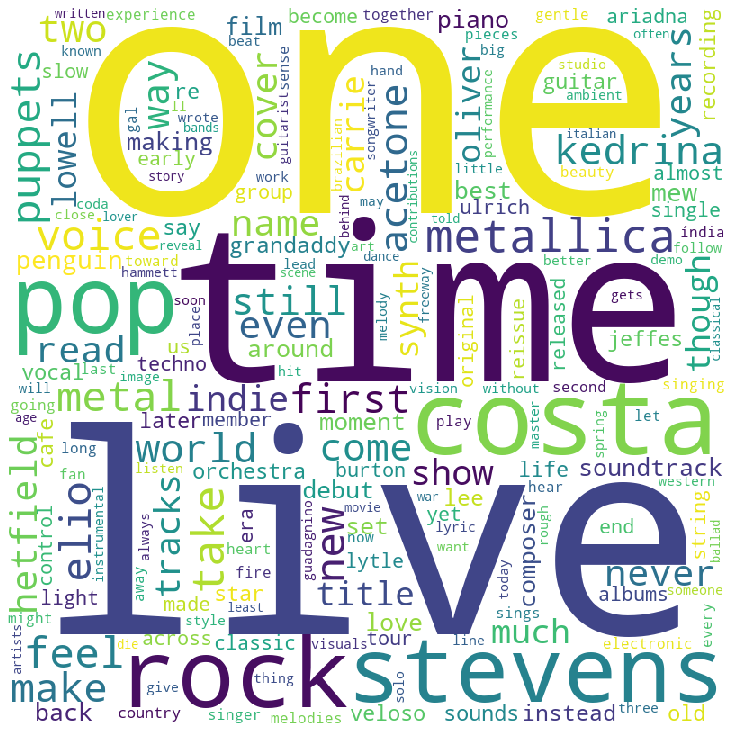

In [20]:
plotWordCloud(user_recs_p4k.head(10))

## Generate User Library Recommendations

**For all 3 users.**

**Danceability & Instrumentalness based on these showing many differences between our 3 libraries in Andres' analysis.**

**High values on these audio features: Look at the top 80% of these values to form user's search vector.**

**Future Idea for Vectorizing**

Loudness ranges from -60 to 0. In P4K and in our libraries, divide the loudness column by -60 to get decimals going 0 to 1.

Doing some research, it seems like high tempo songs are around 140-180. In P4K and in our libraries, divide the tempo column by 200 to get decimals going 0 to 1. Highest tempo in P4K is 193.24, Highest in libraries is 186.005.

Regenerate user library vectors, album recommendations. Run the same analysis on these new albums.

Instrumentalness Data Set Generation:

In [21]:
# general settings for the search
audio_feat_sort = 'instrumentalness'
is_weighted = True
percent_above = 0.8
len_df = sp_p4k_2017_df.shape[0]


# For Anand ###############################################
user_df = our_tracks_by_users.get_group('Anand')
audio_feat_threshold = user_df[audio_feat_sort].quantile(percent_above) # top 20% of audio feature

# get the subset of library in top 20%
user_df_filtered = user_df[user_df[audio_feat_sort] > audio_feat_threshold]

# get our library vector
library_vector_high_instr_anand = get_library_vector_noFilter(user_df_filtered, is_weighted)
print(library_vector_high_instr_anand)

# get our recommendations
alb_recs_high_instr_anand = P4K_Recommended_noFilter(library_vector_high_instr_anand, sp_p4k_2017_df)
alb_recs_high_instr_anand.insert(0, 'username', 'Anand')
# alb_recs_high_instr_anand.head(10)
# alb_recs_high_instr_anand.shape

# For Lina ###############################################
user_df = our_tracks_by_users.get_group('Lina')
audio_feat_threshold = user_df[audio_feat_sort].quantile(percent_above) # top 20% of audio feature

# get the subset of library in top 20%
user_df_filtered = user_df[user_df[audio_feat_sort] > audio_feat_threshold]

# get our library vector
library_vector_high_instr_lina = get_library_vector_noFilter(user_df_filtered, is_weighted)
print(library_vector_high_instr_lina)

# get our recommendations
alb_recs_high_instr_lina = P4K_Recommended_noFilter(library_vector_high_instr_lina, sp_p4k_2017_df)
alb_recs_high_instr_lina.insert(0, 'username', 'Lina')

# alb_recs_high_instr_lina.head(10)

# For Andres ###############################################
user_df = our_tracks_by_users.get_group('Andres')
audio_feat_threshold = user_df[audio_feat_sort].quantile(percent_above) # top 20% of audio feature

# get the subset of library in top 20%
user_df_filtered = user_df[user_df[audio_feat_sort] > audio_feat_threshold]

# get our library vector
library_vector_high_instr_andres = get_library_vector_noFilter(user_df_filtered, is_weighted)
print(library_vector_high_instr_andres)

# get our recommendations
alb_recs_high_instr_andres = P4K_Recommended_noFilter(library_vector_high_instr_andres, sp_p4k_2017_df)
alb_recs_high_instr_andres.insert(0, 'username', 'Andres')
# alb_recs_high_instr_andres.head(10)


{'popularity': {'average_value': 25.675, 'weight': 3.228085939034585}, 'danceability': {'average_value': 0.37842375, 'weight': 3.6873808648722557}, 'energy': {'average_value': 0.4363949999999999, 'weight': 3.251429641208101}, 'loudness': {'average_value': -14.407587499999995, 'weight': 4.796291239512725}, 'speechiness': {'average_value': 0.055125, 'weight': 2.900558372879952}, 'acousticness': {'average_value': 0.59282982375, 'weight': 3.1008222939663517}, 'instrumentalness': {'average_value': 0.929, 'weight': 67.10236556732758}, 'liveness': {'average_value': 0.16612375000000004, 'weight': 2.6046414317083193}, 'valence': {'average_value': 0.25517124999999996, 'weight': 2.148289808765208}, 'tempo': {'average_value': 114.83094999999999, 'weight': 7.180134840724925}}
{'popularity': {'average_value': 40.1875, 'weight': 8.111571131895891}, 'danceability': {'average_value': 0.5917749999999999, 'weight': 17.98427979098771}, 'energy': {'average_value': 0.60686125, 'weight': 11.968283963675276},

In [22]:
alb_recs_high_instr_lina.head(10)


,username,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
68,Lina,spotify:album:0YrdQQiUYjNmLPs0SI53qy,The 1st,Willow,0.5847,0.4465,0.4096,0.0946,0.1485,-9.0056,...,1906863,0,Willow,0,November 9 2017,Pop/R&B,"With her second album, Willow Smith opts for a...",6.7000,overrated,3.6308
811,Lina,spotify:album:5lrlWKjNY0eTDXp9Bd3LpW,Madonna,Madonna,0.0964,0.8446,0.6614,0.0255,0.1202,-8.8649,...,3274650,0,Madonna,0,August 16 2017,Pop/R&B,The driving force of Madonna’s debut remains i...,8.2000,favorites,4.4180
219,Lina,spotify:album:1esJd1JGPa7jDRAKrYs6ls,1992 Deluxe,Princess Nokia,0.1971,0.6812,0.6322,0.0302,0.2203,-8.5331,...,2990874,16,Princess Nokia,0,September 12 2017,Rap,On her newly reissued and expanded 2016 mixtap...,6.2000,overrated,4.5575
232,Lina,spotify:album:1m1V83RrHAsSfmmM8aKy0x,W:/2016ALBUM/,Deadmau5,0.0910,0.7075,0.4949,0.5734,0.1924,-8.9891,...,4753984,0,Deadmau5,0,December 16 2016,Electronic,"On his latest, EDM titan deadmau5 continues to...",5.9000,overrated,6.6981
242,Lina,spotify:album:1qS1VE9DIAcnU8cADHEQo9,Good Nature,Turnover,0.1887,0.6035,0.6835,0.2983,0.1152,-7.8854,...,2505894,0,Turnover,0,August 25 2017,Rock,The last album from Virginia-born band Turnove...,7.3000,favorites,9.3398
153,Lina,spotify:album:1CEeqK9sKrE7LzUHeT3bfP,Do What Thou Wilt.,Ab-Soul,0.1773,0.6121,0.5887,0.0001,0.2651,-9.0143,...,4624764,15,Ab-Soul,0,December 22 2016,Rap,"On his latest, syllable-twisting conspiracy th...",4.4000,overrated,9.4380
587,Lina,spotify:album:4AsXQ17Arq1cUVoa9dKJ3F,Tango in the Night,Fleetwood Mac,0.1790,0.6672,0.6501,0.2852,0.1465,-10.5926,...,10367174,0,Fleetwood Mac,1,March 11 2017,Rock,Best new reissue Tango in the Night is the fin...,8.7000,favorites,9.8961
477,Lina,spotify:album:3QOXA8bqsml8CslUdgHXrW,Painted Ruins,Grizzly Bear,0.2025,0.4667,0.7053,0.1668,0.1127,-6.7888,...,2623210,0,Grizzly Bear,0,August 18 2017,Rock,The intricate compositions on the band’s fifth...,7.3000,favorites,10.6159
323,Lina,spotify:album:2Oyi0iQ92nw0MlO6ehpNwJ,Science Fiction,Brand New,0.2508,0.5038,0.5861,0.1226,0.2771,-6.7906,...,3180000,0,Brand New,1,August 23 2017,Rock,Best new music Brand New’s fifth album stands ...,8.3000,favorites,11.2317
713,Lina,spotify:album:563h536tB6n8Dn62jr4RZG,The Weight of These Wings,Miranda Lambert,0.3322,0.4904,0.6136,0.0070,0.1361,-8.0499,...,5413764,0,Miranda Lambert,0,December 6 2016,Folk/Country,Miranda Lambert’s double album arrives in the ...,7.8000,favorites,11.6159


Danceability Generation

In [23]:
# general settings for the search
audio_feat_sort = 'danceability'
is_weighted = True
percent_above = 0.8

# For Anand ###############################################
user_df = our_tracks_by_users.get_group('Anand')
audio_feat_threshold = user_df[audio_feat_sort].quantile(percent_above) # top 20% of audio feature

# get the subset of library in top 20%
user_df_filtered = user_df[user_df[audio_feat_sort] > audio_feat_threshold]

# get our library vector
library_vector_high_danc_anand = get_library_vector_noFilter(user_df_filtered, is_weighted)
print(library_vector_high_danc_anand)

# get our recommendations
alb_recs_high_danc_anand = P4K_Recommended_noFilter(library_vector_high_danc_anand, sp_p4k_2017_df)
alb_recs_high_danc_anand.insert(0, 'username', 'Anand')
# alb_recs_high_danc_anand.head(10)
# alb_recs_high_instr_anand.shape

# For Lina ###############################################
user_df = our_tracks_by_users.get_group('Lina')
audio_feat_threshold = user_df[audio_feat_sort].quantile(percent_above) # top 20% of audio feature

# get the subset of library in top 20%
user_df_filtered = user_df[user_df[audio_feat_sort] > audio_feat_threshold]

# get our library vector
library_vector_high_danc_lina = get_library_vector_noFilter(user_df_filtered, is_weighted)
print(library_vector_high_danc_lina)

# get our recommendations
alb_recs_high_danc_lina = P4K_Recommended_noFilter(library_vector_high_danc_lina, sp_p4k_2017_df)
alb_recs_high_danc_lina.insert(0, 'username', 'Lina')
# alb_recs_high_danc_lina.head(10)

# For Andres ###############################################
user_df = our_tracks_by_users.get_group('Andres')
audio_feat_threshold = user_df[audio_feat_sort].quantile(percent_above) # top 20% of audio feature

# get the subset of library in top 20%
user_df_filtered = user_df[user_df[audio_feat_sort] > audio_feat_threshold]

# get our library vector
library_vector_high_danc_andres = get_library_vector_noFilter(user_df_filtered, is_weighted)
print(library_vector_high_danc_andres)

# get our recommendations
alb_recs_high_danc_andres = P4K_Recommended_noFilter(library_vector_high_danc_andres, sp_p4k_2017_df)
alb_recs_high_danc_andres.insert(0, 'username', 'Andres')
# alb_recs_high_danc_andres.head(10)


{'popularity': {'average_value': 32.275, 'weight': 5.744851416185974}, 'danceability': {'average_value': 0.7338374999999997, 'weight': 32.90012949016502}, 'energy': {'average_value': 0.6058375, 'weight': 10.74122295750071}, 'loudness': {'average_value': -9.923537499999998, 'weight': 9.007850012555593}, 'speechiness': {'average_value': 0.06798500000000002, 'weight': 3.8077540168400175}, 'acousticness': {'average_value': 0.30851560375000003, 'weight': 3.0797235335159137}, 'instrumentalness': {'average_value': 0.484061360125, 'weight': 4.189510650557332}, 'liveness': {'average_value': 0.13887750000000001, 'weight': 4.762552540526898}, 'valence': {'average_value': 0.5023762499999997, 'weight': 6.1671528107248506}, 'tempo': {'average_value': 122.91891249999999, 'weight': 19.599252571427677}}
{'popularity': {'average_value': 54.325, 'weight': 6.267107434523787}, 'danceability': {'average_value': 0.812275, 'weight': 41.865603507681435}, 'energy': {'average_value': 0.6018624999999997, 'weight'

In [24]:
alb_recs_high_danc_anand.head(50)

,username,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
738,Anand,spotify:album:5HDvIlBDfoHiugEXmYULng,Sketches for My Sweetheart the Drunk,Jeff Buckley,0.4553,0.4266,0.5763,0.1768,0.1457,-9.3638,...,6064793,0,Jeff Buckley,0,December 11 2016,Rock,Jeff Buckley died before completing his second...,8.0000,favorites,4.1975
654,Anand,spotify:album:4cXAcWU9jjDPTAAM8JyDmK,Iteration,Com Truise,0.1292,0.6192,0.5732,0.7511,0.2277,-9.8568,...,2998528,0,Com Truise,0,June 24 2017,Electronic,"As Com Truise, the producer Seth Haley works w...",6.7000,overrated,4.9145
240,Anand,spotify:album:1p6cWoueuunhpgy6131zAd,Easter,Patti Smith Group,0.2062,0.4119,0.6546,0.0003,0.2214,-9.3567,...,2818250,1,Patti Smith Group,0,May 28 2017,Rock,Easter embraces and rebukes rock’n’roll. It’s ...,8.8000,favorites,8.0089
506,Anand,spotify:album:3dCkTzpjov8l9Nosb4tem6,Birdie,"Slaughter Beach, Dog",0.4869,0.6233,0.4387,0.0743,0.1199,-10.3737,...,2340202,2,"Slaughter Beach, Dog",0,November 14 2017,None,With the second album from his Slaughter Beach...,6.8000,overrated,8.6134
14,Anand,spotify:album:06z5kktv4TUsmlQk2vj0Wn,Ash,Ibeyi,0.3799,0.6116,0.4346,0.0874,0.2472,-9.4100,...,2155479,0,Ibeyi,1,October 4 2017,Global,"Best new music On their second album, the Fren...",8.3000,favorites,8.7485
167,Anand,spotify:album:1HMhRPoLIY1Rd0tRzTXfzj,ENGLiSH TAPAS,Sleaford Mods,0.2384,0.8997,0.6162,0.0105,0.1256,-7.5491,...,2259302,8,Sleaford Mods,0,March 6 2017,Rock,"On their first full-length for Rough Trade, th...",7.9000,favorites,9.6050
205,Anand,spotify:album:1VDnqZVFSg0xVF104kaIix,Brick Body Kids Still Daydream,Open Mike Eagle,0.3946,0.6022,0.6566,0.0686,0.2697,-7.6838,...,2356652,12,Open Mike Eagle,0,September 19 2017,Rap,"Armed with a caustic wit and a poetic eye, Ope...",8.1000,favorites,11.1667
1045,Anand,spotify:album:7sIB15nu0Rp1vR8wXnTx3a,A Very Kacey Christmas,Kacey Musgraves,0.5862,0.6070,0.5288,0.0001,0.1582,-6.6748,...,2259490,0,Kacey Musgraves,0,December 23 2016,Folk/Country,Kacey Musgraves' first holiday album summons ‘...,6.8000,overrated,11.4912
224,Anand,spotify:album:1hXSxD7wpxEHXiLkk69EaQ,Life Will See You Now,Jens Lekman,0.0689,0.7170,0.5829,0.0029,0.1397,-8.7276,...,2472450,0,Jens Lekman,0,February 22 2017,Rock,"On his fourth album, Jens Lekman opens up in n...",8.0000,favorites,12.1276
153,Anand,spotify:album:1CEeqK9sKrE7LzUHeT3bfP,Do What Thou Wilt.,Ab-Soul,0.1773,0.6121,0.5887,0.0001,0.2651,-9.0143,...,4624764,15,Ab-Soul,0,December 22 2016,Rap,"On his latest, syllable-twisting conspiracy th...",4.4000,overrated,12.3831


In [25]:
alb_recs_high_danc_lina.head(50)

,username,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
1004,Lina,spotify:album:7GoZNNb7Yl74fpk8Z6I2cv,4:44,JAY-Z,0.2949,0.6019,0.7476,0.0000,0.2666,-6.4276,...,2172236,10,JAY-Z,1,July 5 2017,Rap,Best new music The most crafty and evasive MC ...,8.4000,favorites,5.0799
170,Lina,spotify:album:1HiN2YXZcc3EjmVZ4WjfBk,Everybody,Logic,0.2484,0.7082,0.7557,0.0002,0.2116,-6.6304,...,4260341,13,Logic,0,May 12 2017,Rap,The Maryland rapper’s latest is an impossibly ...,5.2000,overrated,6.1434
795,Lina,spotify:album:5fkFWJ9LZizXE4yPenNGuy,Gang Signs & Prayer,Stormzy,0.4454,0.5909,0.6153,0.0000,0.2286,-7.3604,...,3379922,12,Stormzy,0,February 28 2017,Rap,The debut solo album from the breakout grime M...,7.6000,favorites,9.1759
1020,Lina,spotify:album:7dRdaGSxgcBdJnrOviQRuB,Life After Death,The Notorious B.I.G.,0.1794,0.6778,0.7732,0.0005,0.2247,-4.9218,...,6560697,24,The Notorious B.I.G.,0,March 9 2017,Rap,Today we commemorate the 20th anniversary of C...,9.5000,favorites,9.2699
883,Lina,spotify:album:6QdCohkHKNTVoaSx1ZzitH,Metallica,Metallica,0.0066,0.5547,0.7883,0.0971,0.1241,-7.8407,...,3757331,0,Metallica,0,July 9 2017,Metal,"After years of wild thrash metal, Metallica si...",7.7000,favorites,10.2650
529,Lina,spotify:album:3lajefIuUk4SfzqVBSJy8p,Good for You,Aminé,0.3657,0.7219,0.4672,0.0000,0.2048,-7.8395,...,3149622,15,Aminé,0,August 1 2017,Rap,The Portland rapper’s debut album balances pla...,7.3000,favorites,10.8917
633,Lina,spotify:album:4TkmrrpjlPoCPpGyDN3rkF,A Deeper Understanding,The War on Drugs,0.1777,0.4367,0.7074,0.1023,0.1137,-6.6027,...,3595091,0,The War on Drugs,1,August 25 2017,Rock,Best new music The obsessive studio work of Ad...,8.7000,favorites,12.3540
1013,Lina,spotify:album:7K6OykPbezfgKgBufihn6X,HNDRXX,Future,0.1745,0.7267,0.5363,0.0281,0.1479,-7.2326,...,4148942,18,Future,0,March 3 2017,Rap,"Over a well-played hand of wistful, bright-eye...",7.8000,favorites,13.0710
108,Lina,spotify:album:0qr1Fvi1haEDWVbFtekZLb,Cozy Tapes Vol. 2: Too Cozy,A$AP Mob,0.3026,0.7432,0.6261,0.0021,0.2091,-6.9572,...,3106100,17,A$AP Mob,0,August 31 2017,Rap,"A$AP Mob’s latest group effort features RZA, F...",6.0000,overrated,13.2173
114,Lina,spotify:album:0tKX7BLXiiRgXUKYdJzjEz,A Love Letter to You 2,Trippie Redd,0.3828,0.7555,0.5655,0.0001,0.2036,-6.5180,...,3548361,21,Trippie Redd,0,October 16 2017,Rap,Ohio rapper Trippie Redd’s second mixtape this...,6.4000,overrated,13.3996


In [26]:
alb_recs_high_danc_andres.head(50)

,username,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
664,Andres,spotify:album:4g3qNgrLn8qyubBi0wqVZH,ununiform,Tricky,0.4628,0.7162,0.4829,0.1544,0.1434,-9.5310,...,2340309,1,Tricky,0,September 20 2017,Electronic,"On his 13th studio album, Tricky translates ne...",5.1000,overrated,3.2255
313,Andres,spotify:album:2K3XaSsGQ9Bxxr7byYAcrO,B-Sides and Rarities,Beach House,0.4621,0.4219,0.4720,0.4105,0.1574,-9.9147,...,3395239,0,Beach House,0,July 6 2017,Rock,The collected footnotes from the Baltimore ban...,6.9000,overrated,4.2657
85,Andres,spotify:album:0glWUNA3VeICkmoEp7UwXQ,Yes Lawd! Remixes,NxWorries,0.2075,0.4432,0.5983,0.1405,0.2350,-9.3492,...,1423422,12,NxWorries,0,November 30 2017,Pop/R&B,On this collection of remixes from Anderson .P...,7.4000,favorites,4.7728
9,Andres,spotify:album:04a2Vx232ZWNVcoGQEyKGD,Rap Album Two,Jonwayne,0.6036,0.5552,0.6092,0.0132,0.2119,-8.1134,...,2496410,5,Jonwayne,0,February 27 2017,Rap,"Finally full of purpose, rapper Jonwayne navig...",7.6000,favorites,7.5599
146,Andres,spotify:album:19lVMS3ZOoJi5CdRKvoOiP,TLC,TLC,0.2019,0.7163,0.5720,0.0394,0.2331,-13.1096,...,3300170,0,TLC,0,July 6 2017,Pop/R&B,"With the final TLC album, Chilli and T-Boz hav...",7.4000,favorites,8.9823
460,Andres,spotify:album:3IbY6WzMWrPx7ZnqMfEkd6,Electric Lines,Joe Goddard,0.1833,0.6982,0.5178,0.4103,0.1235,-10.9418,...,4252198,0,Joe Goddard,0,April 17 2017,Electronic,The Hot Chip founding member’s first official ...,7.2000,overrated,9.1249
379,Andres,spotify:album:2kEqaFXOjqbwd6nKci9pEX,"Doing It in Lagos: Boogie, Pop & Disco in 1980...",Various Artists,0.1323,0.7388,0.7477,0.2445,0.1730,-8.6365,...,6247795,0,Various Artists,1,January 10 2017,None,Best new reissue This prescient reissue delive...,8.5000,favorites,9.4406
509,Andres,spotify:album:3esB4Gl0K2LKCgACUJa3mu,Polygondwanaland,King Gizzard & The Lizard Wizard,0.2245,0.4813,0.6431,0.5326,0.1982,-9.2333,...,2632339,0,King Gizzard & The Lizard Wizard,0,December 1 2017,Rock,Psych-rock band King Gizzard is giving its fou...,7.2000,overrated,9.5141
227,Andres,spotify:album:1iVf41qWHZsAk9DwY43WnV,"Here, My Dear",Marvin Gaye,0.3906,0.6198,0.5174,0.0032,0.1917,-12.6629,...,4393658,0,Marvin Gaye,0,July 2 2017,Pop/R&B,What was supposed to be a kiss-off alimony pay...,8.7000,favorites,10.1919
566,Andres,spotify:album:41tn9gcVocI693HtBidKfi,12,A$AP Twelvyy,0.3727,0.6350,0.5956,0.0000,0.2730,-8.3461,...,2323796,14,A$AP Twelvyy,0,August 12 2017,Rap,A$AP Twelvyy’s long-awaited solo debut wears i...,6.4000,overrated,10.8988


## Save album recs to CSV

In [27]:
# save combined albums to csv
alb_recs_high_danc_anand.to_csv("alb_recs_high_danc_anand.csv", encoding="utf-8-sig")
alb_recs_high_danc_lina.to_csv("alb_recs_high_danc_lina.csv", encoding="utf-8-sig")
alb_recs_high_danc_andres.to_csv("alb_recs_high_danc_andres.csv", encoding="utf-8-sig")

alb_recs_high_instr_anand.to_csv("alb_recs_high_instr_anand.csv", encoding="utf-8-sig")
alb_recs_high_instr_lina.to_csv("alb_recs_high_instr_lina.csv", encoding="utf-8-sig")
alb_recs_high_instr_andres.to_csv("alb_recs_high_instr_andres.csv", encoding="utf-8-sig")